In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X, y = data.data, data.target

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred))


Linear Kernel Accuracy: 0.956140350877193


In [4]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))


RBF Kernel Accuracy: 0.9736842105263158


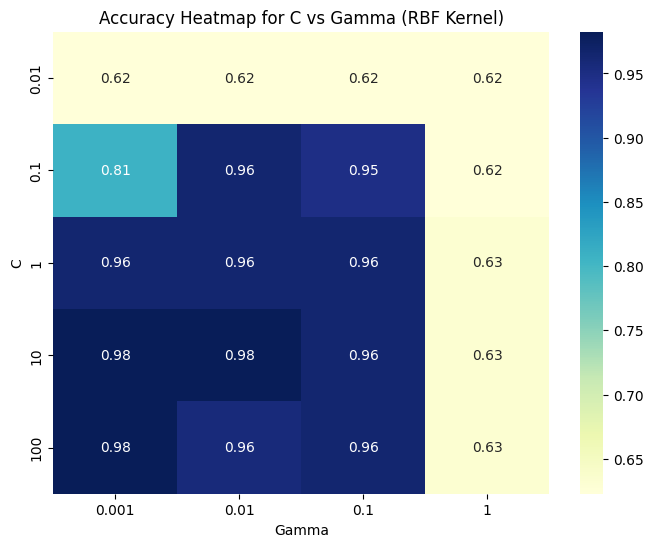

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C_values = [0.01, 0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1]

results = []
for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        results.append((C, gamma, acc))

# Plot heatmap
result_matrix = np.array(results).reshape(len(C_values), len(gamma_values), 3)
accuracy_matrix = result_matrix[:, :, 2]

plt.figure(figsize=(8, 6))
sns.heatmap(accuracy_matrix, annot=True, xticklabels=gamma_values, yticklabels=C_values, cmap='YlGnBu')
plt.xlabel("Gamma")
plt.ylabel("C")
plt.title("Accuracy Heatmap for C vs Gamma (RBF Kernel)")
plt.savefig("hyperparam_tuning.png")
plt.show()


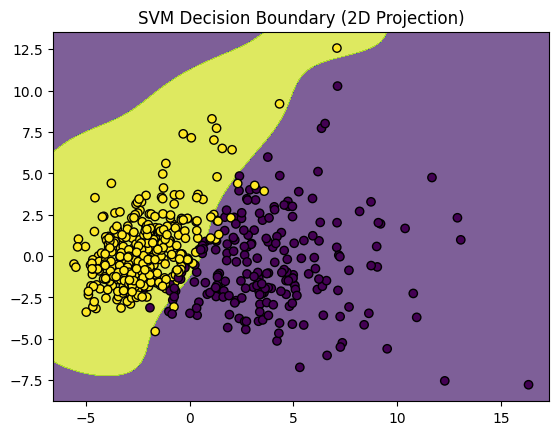

In [6]:
# Reduce features to 2D for plotting
from sklearn.decomposition import PCA

X_2d = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=42)

model_2d = SVC(kernel='rbf', C=1, gamma=0.1)
model_2d.fit(X_train, y_train)

# Create meshgrid
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.7)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor='k')
plt.title("SVM Decision Boundary (2D Projection)")
plt.savefig("rbf_boundary.png")
plt.show()
